#### AutoEncoders, Unsupervised , Semi-Supervised

* AE take an input vector , encode it into a latent space , decode it for an output 
    * AE mainly recreate inputs with minimal loss 
* Two main types :
    * Undercomplete : Middle layers with less neuronal dimension than input and output : bottleneck
    * Overcomplete : Middle layers with higher dimension than input and output


In [ ]:
import pandas as pd
from tensorflow import keras
print('pandas: %s' % pd.__version__) 
print('tf keras : %s' % keras.__version__)

from keras.models import Model ,load_model
from keras import Input
from keras.layers import Dense, LeakyReLU, BatchNormalization
from tensorflow.keras.utils import plot_model


import sklearn 
print('sklearn: %s' % sklearn.__version__) 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


import matplotlib 
import matplotlib .pyplot as plt
print('matplotlib: %s' % matplotlib.__version__) 

import graphviz
print('graphviz: %s' % graphviz.__version__)



pandas: 1.3.5
tf keras : 2.9.0
sklearn: 1.0.2
matplotlib: 3.2.2
graphviz: 0.10.1


In [ ]:
# Data Pre-Processing
# Display k columns in pandas 
pd.options.display.max_columns = 30

# Read australian wheather data 
df = pd.read_csv('weatherAUS.csv',encoding = 'utf-8')

# Drop rows with missing values

df = df.dropna(axis = 0)

# Create flag for RainToday column 

df['RainTodayFlag'] = df['RainToday'].apply(lambda x:1 if x=='Yes' else 0 )

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainTodayFlag
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,0
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,0
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,0
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,0
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,0
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,0
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,0
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,0


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'RainTodayFlag'],
      dtype='object')

In [ ]:
# Data Processing
# Feature Selection

X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 
      'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',  
      'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainTodayFlag']]


# MinMaxScaling

Scaler = MinMaxScaler()
X_scaled = Scaler.fit_transform(X)

In [ ]:
# Train & Test Sample

X_train , X_test = train_test_split(X_scaled , test_size = 0.25, random_state = 0 )

In [ ]:
# Build an AutoEncoder 

# Number of Input neurons & Bottleneck
n_inputs = X_train.shape[1]

n_bottleneck = (n_inputs // 3)


In [ ]:
# Input Layer

Input_Layer = Input(shape=(n_inputs,), name = 'Input-Layer')
# Encoder Layer 
Enc = Dense(units = n_inputs, name = 'Encoder-Layer')(Input_Layer)
Batch_Normalization = BatchNormalization(name = 'Encoder-Layer-Normalization')(Enc)
L_ReLU = LeakyReLU(name = 'Encoder-Layer-Activation')(Batch_Normalization)

# Bottleneck Layer
BottleNeck = Dense (units = n_bottleneck , name = 'Bottleneck-Layer')(L_ReLU)

# Decoder Layer 
Dec = Dense(units = n_inputs, name ='Decoder-Layer')(BottleNeck)
D_Batch_Normalization = BatchNormalization(name = 'Decoder-Layer-Normalization')(Dec)
DL_ReLU = LeakyReLU(name ='Decoder-Layer-Activation')(D_Batch_Normalization)

# Output Layer 
Output_Layer = Dense(units = n_inputs , activation ='linear' , name = 'Output-layer')(DL_ReLU)


Model: "AutoEncoder-Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input-Layer (InputLayer)    [(None, 17)]              0         
                                                                 
 Encoder-Layer (Dense)       (None, 17)                306       
                                                                 
 Encoder-Layer-Normalization  (None, 17)               68        
  (BatchNormalization)                                           
                                                                 
 Encoder-Layer-Activation (L  (None, 17)               0         
 eakyReLU)                                                       
                                                                 
 Bottleneck-Layer (Dense)    (None, 5)                 90        
                                                                 
 Decoder-Layer (Dense)       (None, 17)          

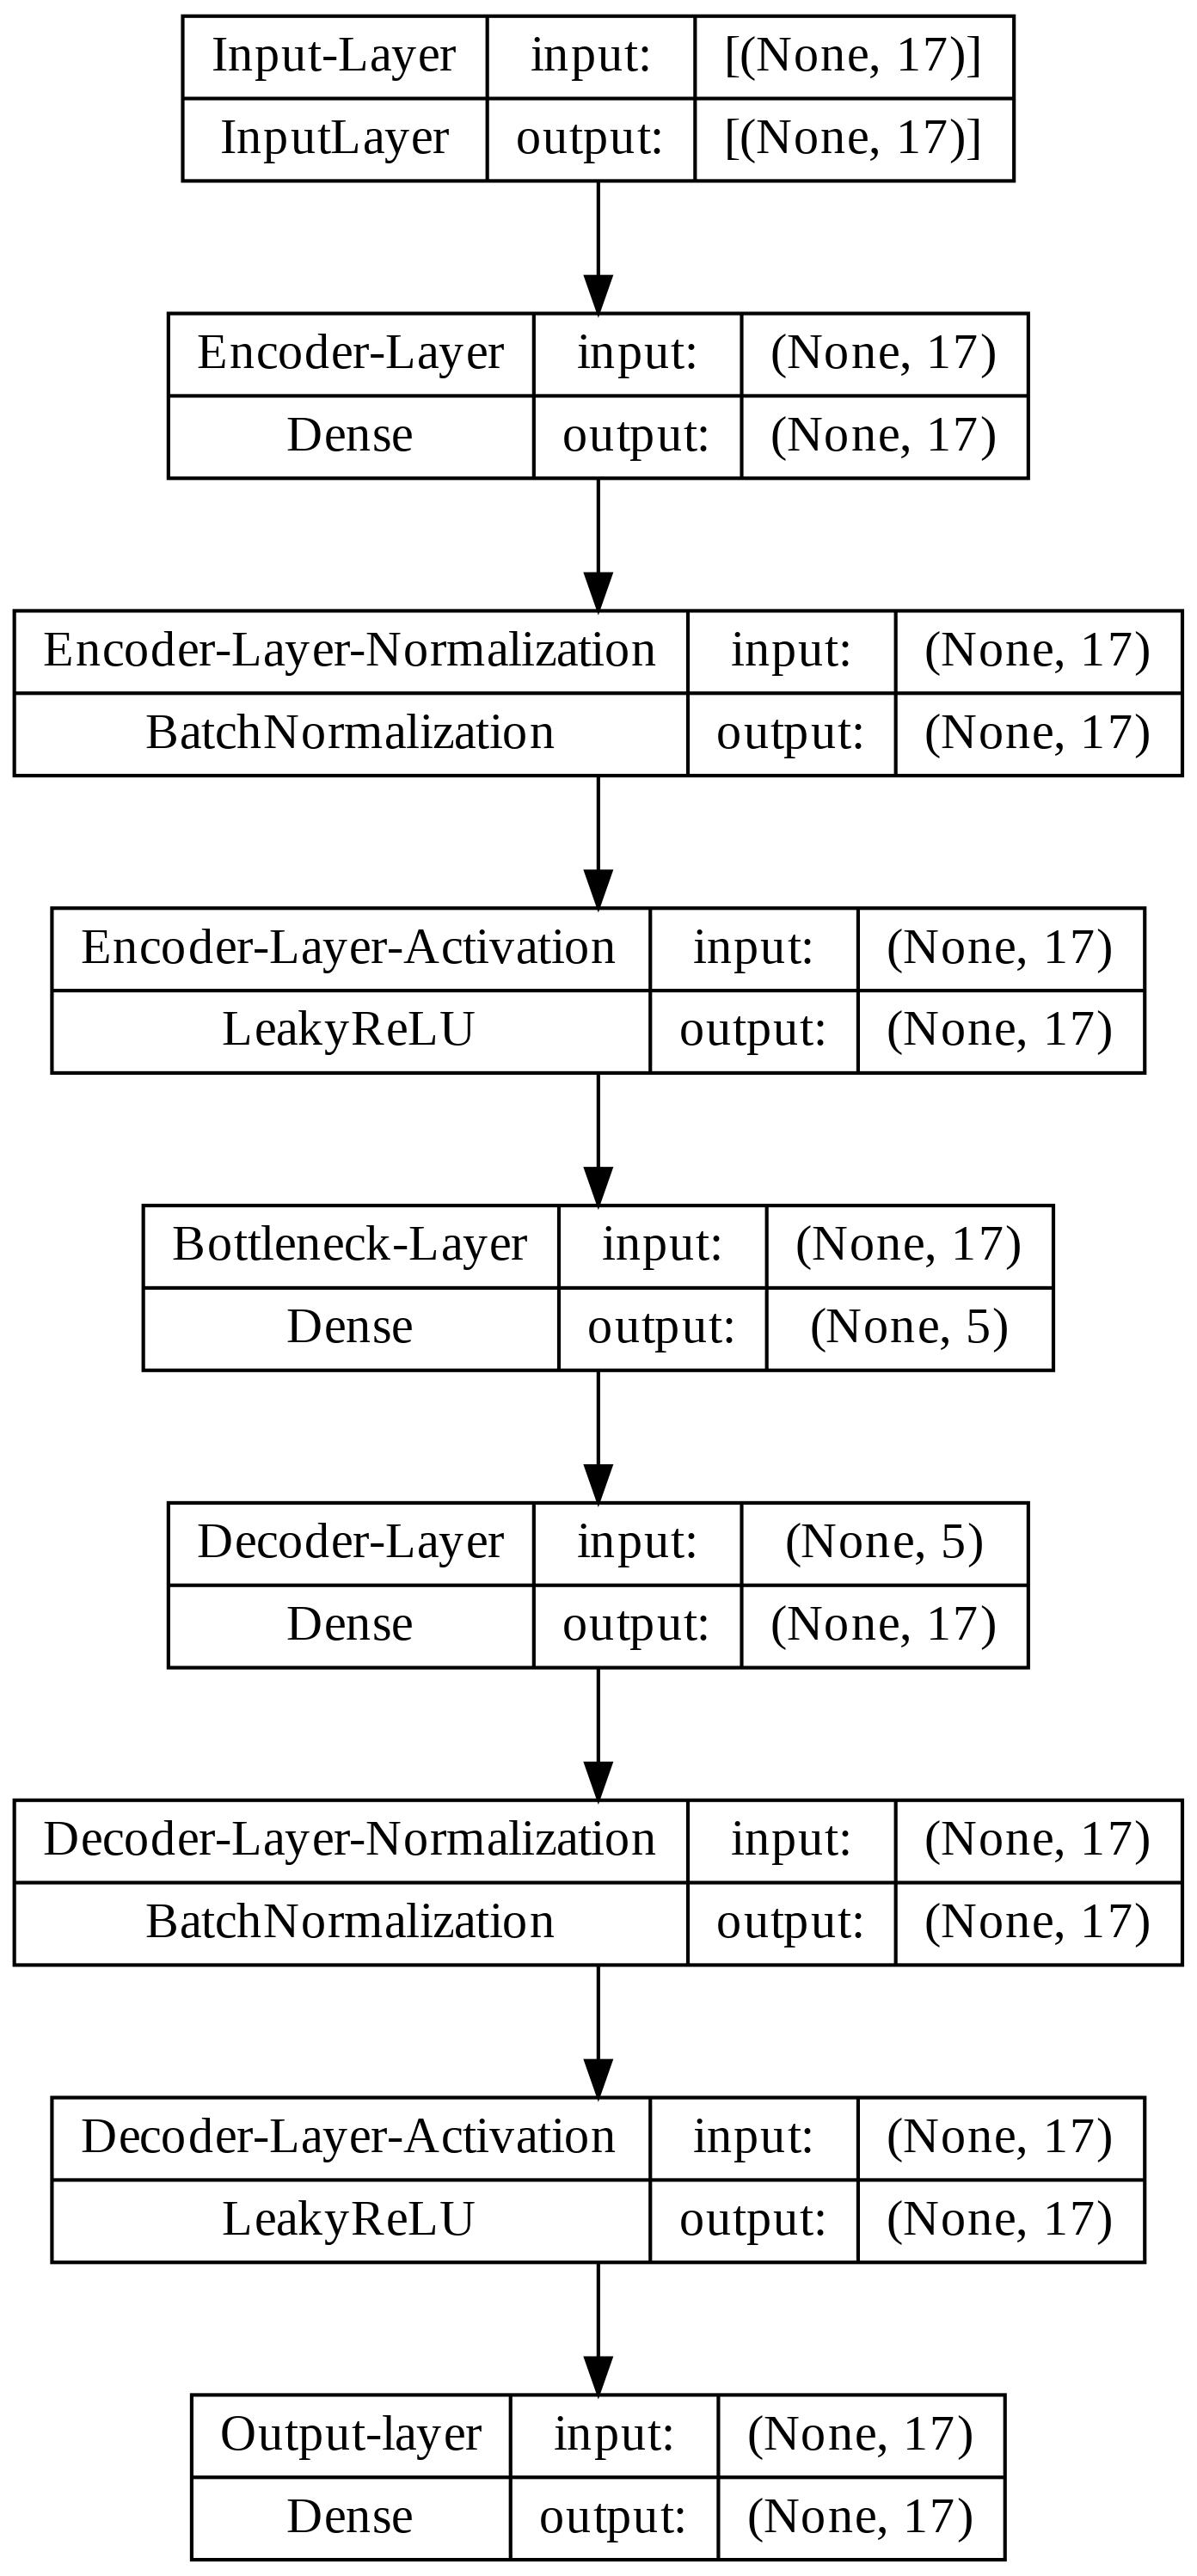

In [ ]:
# The AutoEncoder Model

model = Model(inputs = Input_Layer , outputs = Output_Layer , name ='AutoEncoder-Model')
# Compile Model
model.compile(optimizer = 'adam' ,loss = 'mse')
# Model Summary 
print(model.summary()) 
# AE Diagram 
plot_model(model,show_shapes = True ,dpi =300 )

Epoch 1/15
2645/2645 [==============================] - 9s 3ms/step - loss: 0.0298 - val_loss: 0.0073
Epoch 2/15
2645/2645 [==============================] - 7s 3ms/step - loss: 0.0091 - val_loss: 0.0049
Epoch 3/15
2645/2645 [==============================] - 8s 3ms/step - loss: 0.0079 - val_loss: 0.0044
Epoch 4/15
2645/2645 [==============================] - 9s 3ms/step - loss: 0.0074 - val_loss: 0.0041
Epoch 5/15
2645/2645 [==============================] - 7s 3ms/step - loss: 0.0071 - val_loss: 0.0040
Epoch 6/15
2645/2645 [==============================] - 7s 3ms/step - loss: 0.0066 - val_loss: 0.0039
Epoch 7/15
2645/2645 [==============================] - 7s 3ms/step - loss: 0.0063 - val_loss: 0.0038
Epoch 8/15
2645/2645 [==============================] - 7s 3ms/step - loss: 0.0062 - val_loss: 0.0037
Epoch 9/15
2645/2645 [==============================] - 7s 3ms/step - loss: 0.0060 - val_loss: 0.0036
Epoch 10/15
2645/2645 [==============================] - 8s 3ms/step - loss: 0.005

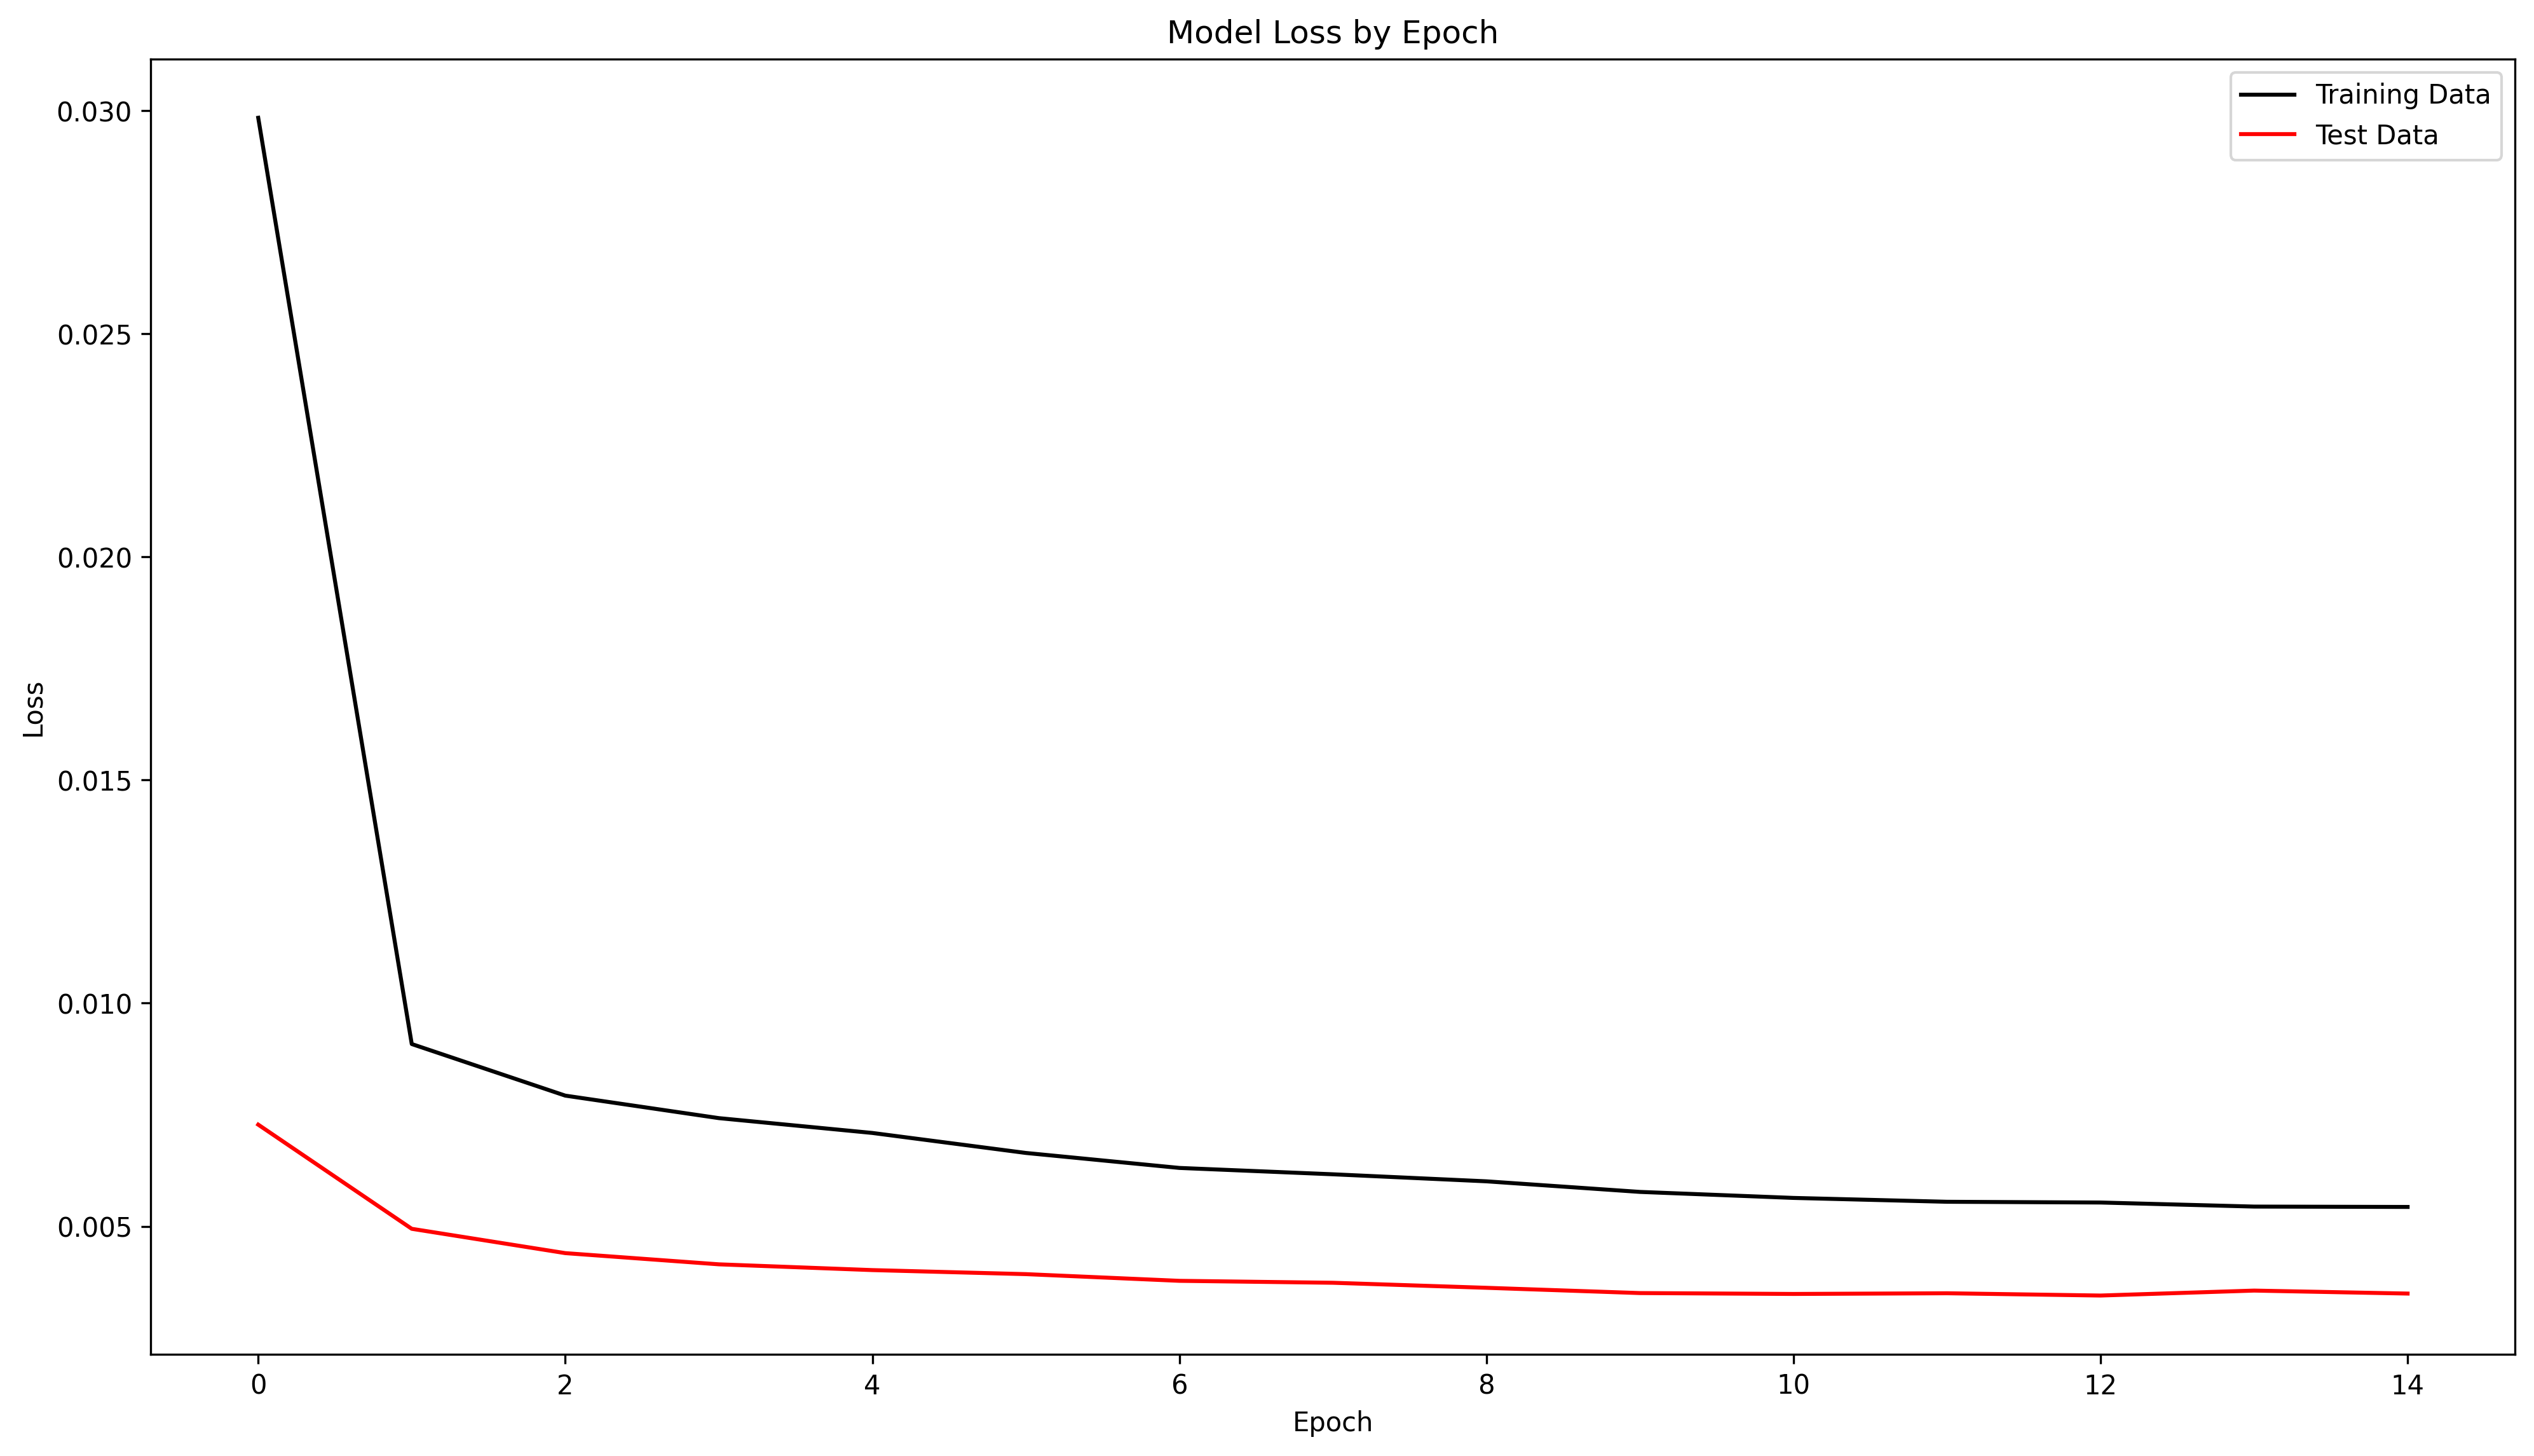

In [ ]:
# Train on k-epochs
k_epochs = 15

history = model.fit(X_train , X_train,epochs = k_epochs, batch_size = 16, verbose = 1, validation_data = (X_test, X_test))
# Plot a loss chart
fig, ax = plt.subplots(figsize=(16,9), dpi=300)
plt.title(label='Model Loss by Epoch', loc='center')

ax.plot(history.history['loss'], label='Training Data', color='black')
ax.plot(history.history['val_loss'], label='Test Data', color='red')
ax.set(xlabel='Epoch', ylabel='Loss')
plt.legend()

plt.show()

In [ ]:
# Encoder Alone
The_Encoder = Model(inputs = Input_Layer, outputs = BottleNeck)

# Compile Encoder 

The_Encoder.compile(optimizer = 'adam' , loss  = 'mse')

# Save 

The_Encoder.save('Encoder.h5')

# Decoder Alone 
The_Decoder = Model (inputs = BottleNeck , outputs = Output_Layer )

# Compile Decoder 
The_Decoder.compile(optimizer = 'adam' , loss  = 'mse')

# Save 

The_Encoder.save('Decoder.h5')

# Save AutoEncoder 
model.save('AutoEncoder.h5')

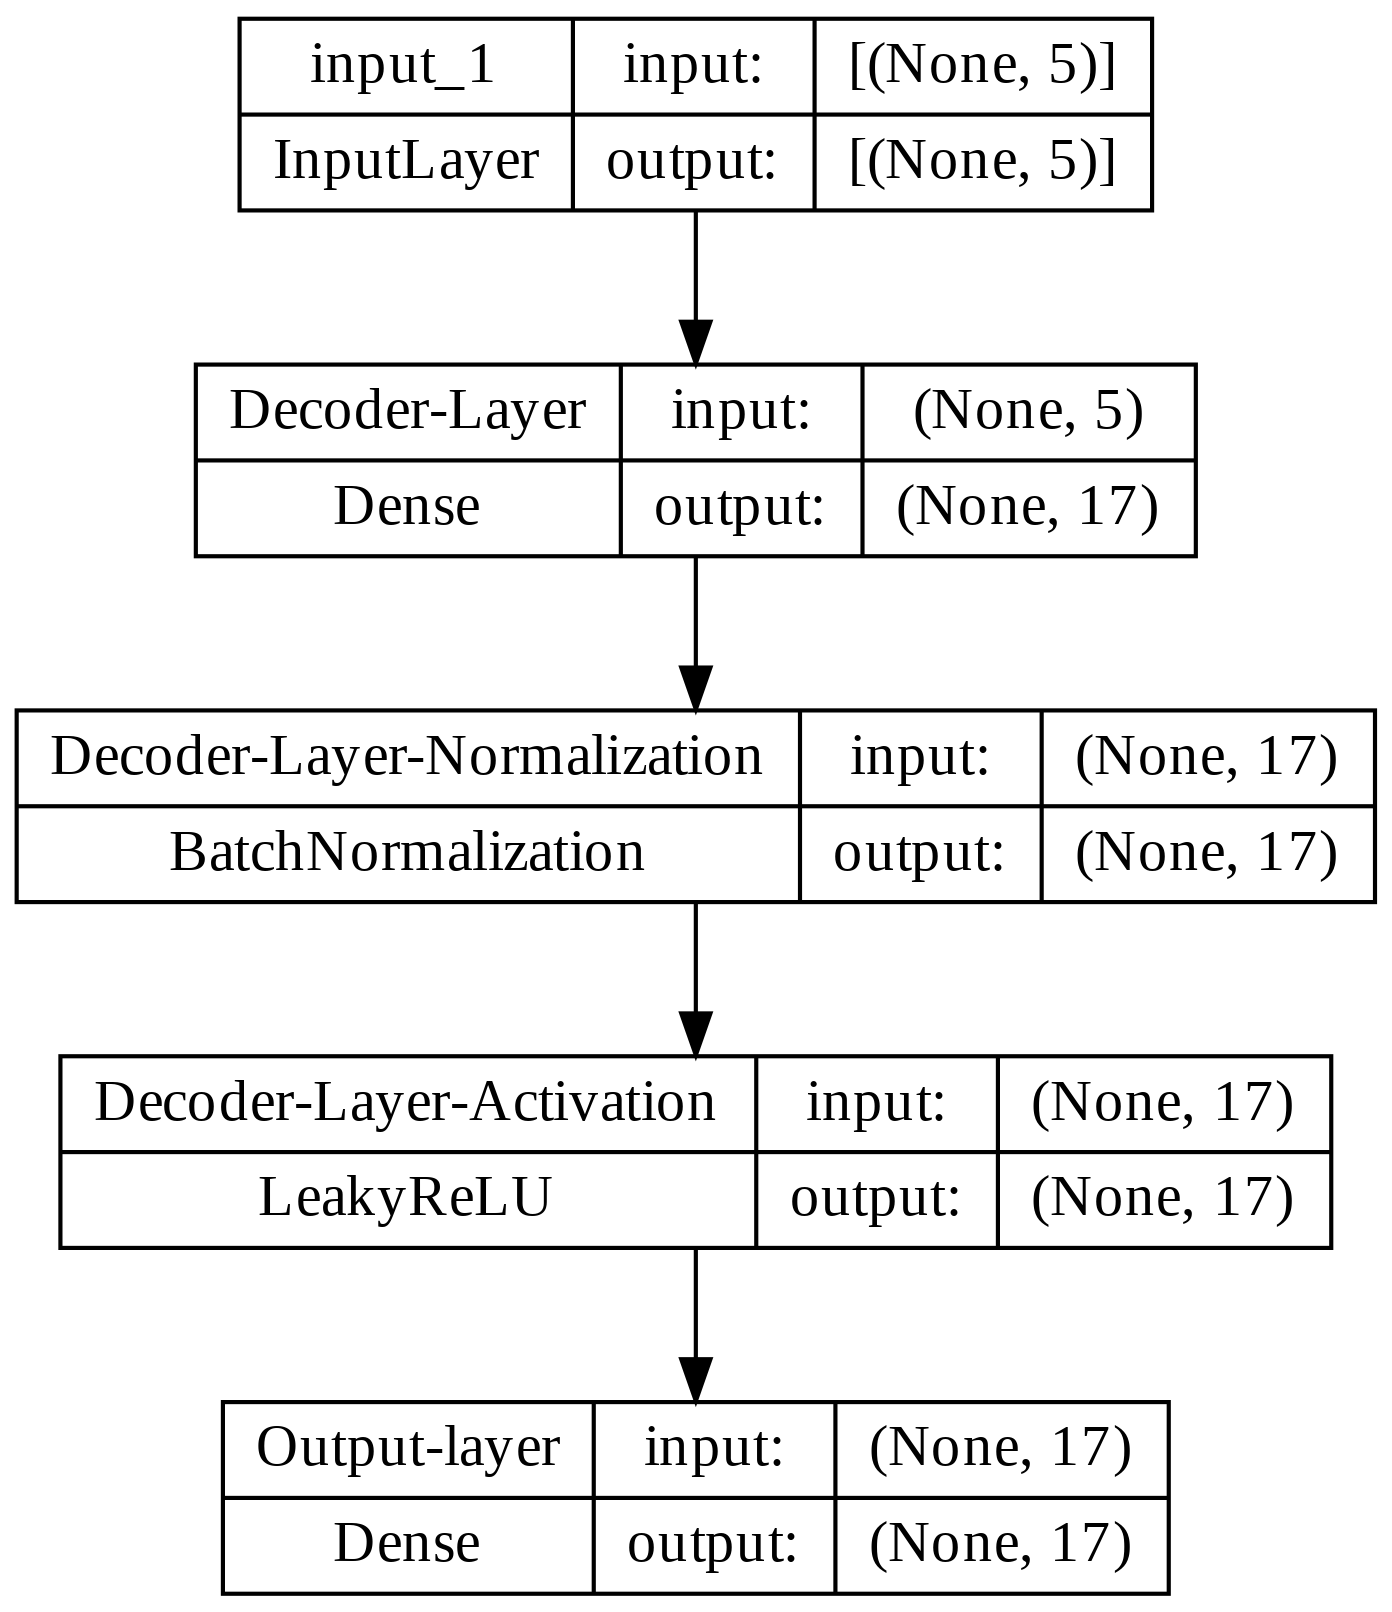

In [ ]:
# Plot Diagrams and Save them


# Encoder
plot_model(The_Encoder, 'Encoder.png', show_shapes=True, dpi=300)

#Decoder
plot_model(The_Decoder, 'Decoder.png', show_shapes=True, dpi=300)